In [1]:
!pip install -q -U google-generativeai

In [1]:
import google.generativeai as genai

In [2]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [3]:
model = genai.GenerativeModel('gemini-pro')

In [6]:
import pandas as pd
import educlus.stcl as stcl
import educlus.explain as expl

In [7]:
data = pd.read_csv('data.csv', index_col=0)
data

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
551792,4,3,2,3,3,3,4,3,3,2,1,2
405890,5,4,2,4,3,3,3,2,3,2,1,2
437186,2,2,1,0,1,1,2,1,1,2,1,1
219843,4,5,2,4,3,4,4,4,4,4,3,3
70474,4,4,2,3,3,3,4,3,4,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
437772,5,4,3,4,3,3,4,4,4,3,2,2
244893,4,4,2,4,3,4,4,4,5,4,2,3
232718,4,3,2,2,2,3,3,3,3,2,1,2
169353,5,5,2,4,3,4,4,4,5,4,3,3


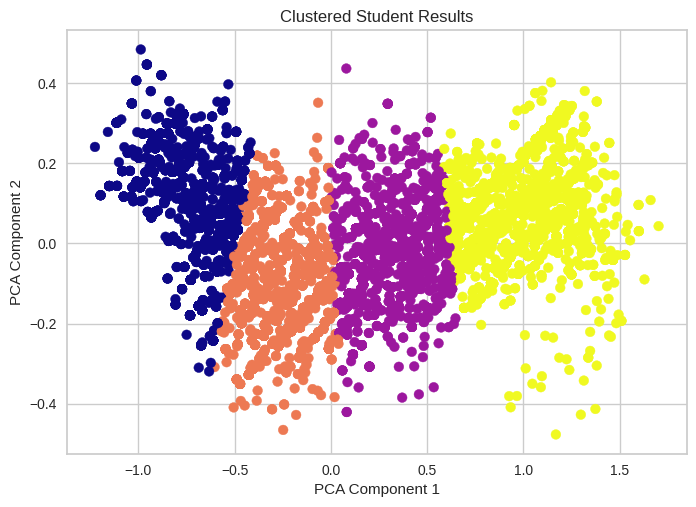

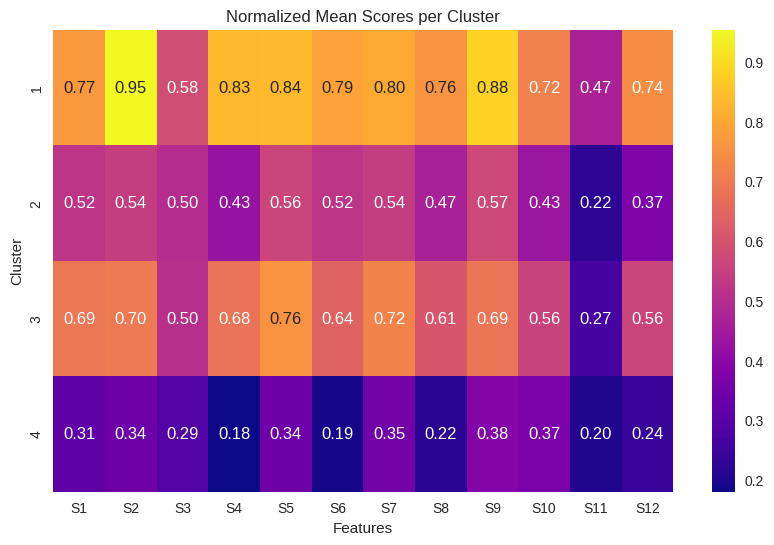

Best clustering algorithm: KMeans


In [8]:
results = stcl.cluster_student_results(data)

In [9]:
results

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
Cluster,,,,,,,,,,,,
1,0.767887,0.953536,0.583984,0.833964,0.836040,0.789391,0.804934,0.758882,0.883306,0.717599,0.468092,0.744449
2,0.520057,0.544219,0.497286,0.425201,0.561940,0.518830,0.541859,0.466352,0.572251,0.434356,0.222369,0.374351
3,0.692073,0.699519,0.504209,0.682081,0.759922,0.637162,0.722971,0.607456,0.686350,0.555803,0.265424,0.558328
4,0.313393,0.342723,0.290744,0.180405,0.341380,0.191145,0.350165,0.218935,0.384079,0.370231,0.202732,0.237871


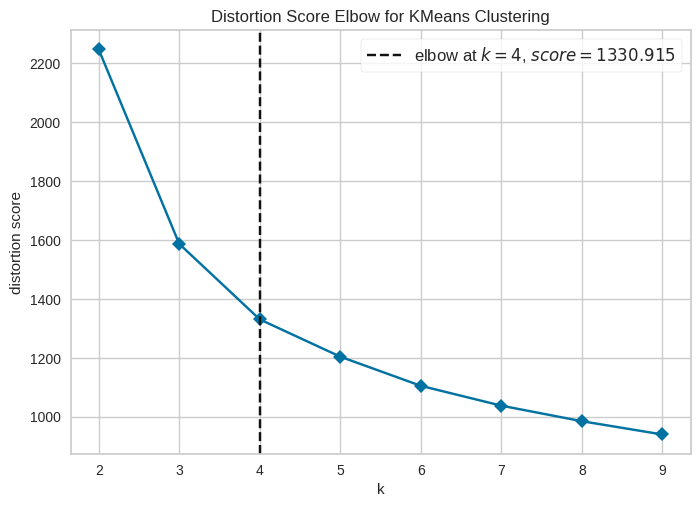

4

In [10]:
stcl.plot_elbow_method(data)

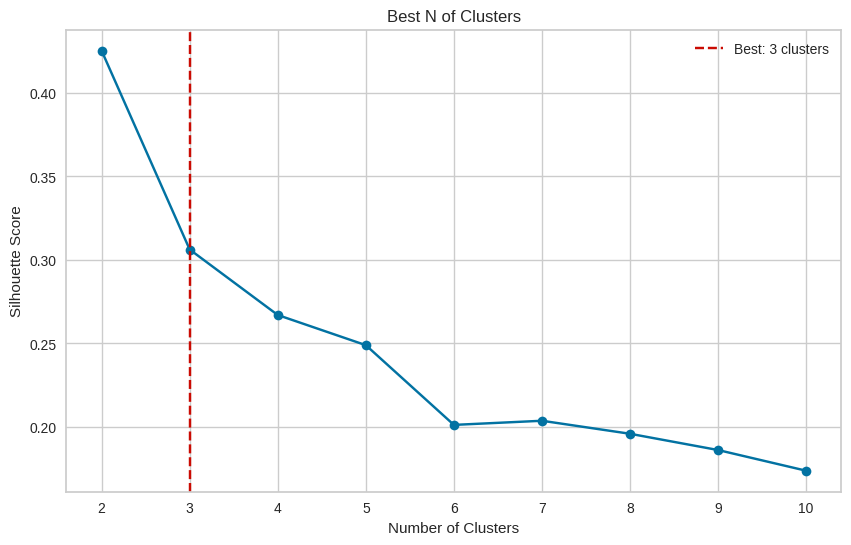

In [11]:
stcl.plot_silhouette_method(data)

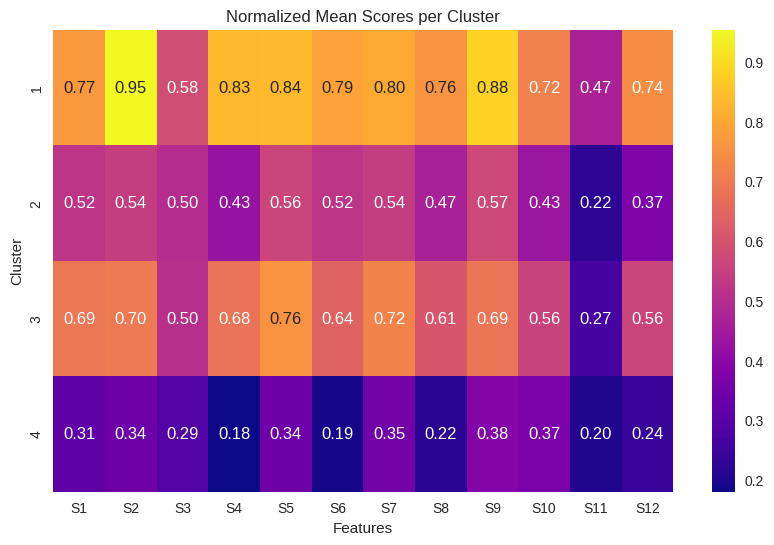

In [12]:
stcl.plot_heatmap(results)

In [13]:
section_mapping = {
    "S1": "Introduction",
    "S2": "Lifecycle of AI Projects",
    "S3": "Key Roles and Competencies of AI Team",
    "S4": "Problem Definition and Model Quality Metrics",
    "S5": "Exploratory Data Analysis",
    "S6": "Data Preprocessing",
    "S7": "Classical Machine Learning",
    "S8": "Ensembles",
    "S9": "Neural Networks",
    "S10": "Reinforcement Learning",
    "S11": "Automation and Acceleration of Computations",
    "S12": "AI Development"
}

In [14]:
for index, row in results.iterrows():
    cluster_label = index
    cluster_data = row.to_dict()
    cluster_data = {key: value for key, value in cluster_data.items() if key.startswith('S')}
    grading_system = 'percentage'
    prompt = expl.get_prompt(cluster_data, cluster_label, section_mapping, grading_system)

    print(f"Explanation for Cluster {cluster_label}:")
    response = model.generate_content(prompt)

    display(expl.to_markdown(response.text))

Explanation for Cluster 1:


> **Strengths**
> 
> **Good performance in sections**
> 
> * **Introduction:** Provides a clear and concise overview of the machine learning field, its applications, and the key concepts involved.
> * **Lifecycle of AI Projects:** Effectively describes the different stages involved in an AI project, from problem definition to deployment.
> * **Problem Definition and Model Quality Metrics:** Demonstrates a strong understanding of the importance of defining the problem and establishing metrics for evaluating model performance.
> * **Exploratory Data Analysis:** Shows proficiency in exploring and visualizing data to gain insights and identify patterns.
> * **Data Preprocessing:** Clearly explains the various techniques for cleaning and preparing data for use in machine learning models.
> * **Classical Machine Learning:** Provides a comprehensive overview of traditional machine learning algorithms, including linear regression, decision trees, and support vector machines.
> * **Ensembles:** Effectively discusses ensemble methods such as bagging, boosting, and random forests, and their advantages in improving model performance.
> * **Neural Networks:** Demonstrates a strong understanding of neural networks, their architecture, and their applications in deep learning.
> * **Reinforcement Learning:** Provides a clear explanation of reinforcement learning concepts and its use in training agents to optimize behavior in dynamic environments.
> * **AI Development:** Effectively outlines the key principles involved in developing AI systems, including data collection, feature engineering, and model evaluation.
> 
> **Satisfactory performance in sections**
> 
> * **Key Roles and Competencies of AI Team:** Provides an adequate overview of the different roles and competencies required in an AI team.
> 
> **Weaknesses**
> 
> * **Low performance in sections**
> * **Automation and Acceleration of Computations:** Shows limited knowledge of techniques for automating and accelerating computations in machine learning, such as parallel computing and cloud-based platforms.
> 
> **Recommendations for improvement**
> 
> * **Automation and Acceleration of Computations:** Focus on improving understanding of techniques for automating and accelerating computations in machine learning, such as parallel computing and cloud-based platforms.
> * **Practical Hands-on Experience:** Encourage students to gain practical hands-on experience in implementing machine learning algorithms and applying them to real-world problems.
> * **Industry Expertise:** Invite industry experts to share their experiences and insights on the practical applications of machine learning in various domains.
> * **Additional Resources:** Provide additional resources, such as online tutorials, books, and articles, to help students deepen their understanding of the concepts covered in the cluster.

Explanation for Cluster 2:


> **Performance Explanation:**
> 
> **Strengths: None**
> - There are no areas identified where the cluster performed with Good performance.
> 
> **Weaknesses:**
> 
> * **Introduction:** The introduction may lack a clear overview of the topic and fails to engage the reader.
> * **Key Roles and Competencies of AI Team:** This section may lack sufficient detail on the specific roles and competencies required for an AI team, such as data scientists, machine learning engineers, and business analysts.
> * **Problem Definition and Model Quality Metrics:** This section may not adequately cover the importance of defining the AI problem and establishing appropriate model quality metrics for evaluating the success of the project.
> * **Ensembles:** This section may lack depth in explaining the concept of ensembling models and its benefits in improving model performance.
> * **Reinforcement Learning:** This section may require more elaboration on the principles of reinforcement learning, its applications, and its advantages and limitations.
> * **Automation and Acceleration of Computations:** This section may not fully explain the techniques and technologies used to automate and accelerate computations in AI projects.
> * **AI Development:** This section may lack a comprehensive overview of the AI development process, including best practices and common challenges.
> 
> **Recommendations for Improvement:**
> 
> * **Introduction:**
>     * Provide a brief overview of machine learning, its importance, and its applications.
>     * State the objectives of the cluster and highlight its relevance to machine learning.
> * **Key Roles and Competencies of AI Team:**
>     * Delve into the specific responsibilities and skills required for each role in an AI team.
>     * Discuss the importance of assembling a diverse team with complementary expertise.
> * **Problem Definition and Model Quality Metrics:**
>     * Emphasize the importance of clearly defining the AI problem and establishing objective quality metrics.
>     * Provide examples of common metrics used to evaluate model performance, such as accuracy, precision, and recall.
> * **Ensembles:**
>     * Explain the concept of ensembling and discuss different ensemble methods, such as bagging, boosting, and stacking.
>     * Provide examples of how ensembles can improve model performance and reduce overfitting.
> * **Reinforcement Learning:**
>     * Provide a concise but thorough explanation of reinforcement learning, including its principles, algorithms, and applications.
>     * Discuss the advantages and limitations of reinforcement learning compared to other machine learning techniques.
> * **Automation and Acceleration of Computations:**
>     * Explain the techniques used to automate AI computations, such as cloud computing, distributed computing, and parallelization.
>     * Discuss the benefits of accelerating computations and the technologies involved, such as GPUs and specialized hardware.
> * **AI Development:**
>     * Provide a holistic overview of the AI development process, from data collection and analysis to model deployment and maintenance.
>     * Discuss common challenges and best practices for ensuring efficient and successful AI development.

Explanation for Cluster 3:


> **Strengths:**
> 
> **Exploratory Data Analysis:**
> * Strong understanding of data exploration techniques and their application.
> * Ability to identify and visualize important patterns and trends in data.
> 
> **Classical Machine Learning:**
> * Solid foundation in traditional machine learning algorithms, such as supervised and unsupervised learning.
> * Demonstrated proficiency in model selection, training, and evaluation.
> 
> **Weaknesses:**
> 
> **Introduction:**
> * Lack of a clear and concise overview of the fundamentals of machine learning.
> * Insufficient explanation of the different types of machine learning tasks and applications.
> 
> **Lifecycle of AI Projects:**
> * Limited understanding of the various phases involved in AI project development, including planning, execution, and evaluation.
> * Inadequate knowledge of best practices for managing AI projects effectively.
> 
> **Key Roles and Competencies of AI Team:**
> * Insufficient understanding of the different roles and responsibilities within an AI team.
> * Limited knowledge of the essential competencies required for successful AI project implementation.
> 
> **Problem Definition and Model Quality Metrics:**
> * Incomplete understanding of the importance of clear problem definition in AI projects.
> * Lack of knowledge about commonly used model quality metrics and their interpretation.
> 
> **Data Preprocessing:**
> * Limited understanding of the importance of data preprocessing for machine learning models.
> * Insufficient knowledge of different data preprocessing techniques and their applications.
> 
> **Ensembles:**
> * Incomplete explanation of the benefits and limitations of ensemble models.
> * Inadequate understanding of how to create and optimize ensemble models.
> 
> **Neural Networks:**
> * Limited understanding of the architecture and functioning of neural networks.
> * Insufficient knowledge of different neural network types and their applications.
> 
> **Reinforcement Learning:**
> * Incomplete explanation of the fundamental concepts of reinforcement learning.
> * Inadequate understanding of the different reinforcement learning algorithms and their applications.
> 
> **AI Development:**
> * Limited knowledge of the different tools and technologies used for AI development.
> * Insufficient understanding of best practices for software engineering and DevOps in AI projects.
> 
> **Automation and Acceleration of Computations:**
> * Minimal understanding of the techniques and tools for automating and accelerating computations in AI.
> * Insufficient knowledge of the benefits and challenges of using cloud computing and distributed computing for AI applications.
> 
> **Recommendations for Improvement:**
> 
> * Review fundamental machine learning concepts and their applications.
> * Study the entire lifecycle of AI projects, including planning, execution, and evaluation.
> * Familiarize with different roles and competencies within an AI team.
> * Understand the importance of problem definition and model quality metrics.
> * Enhance knowledge of data preprocessing techniques and their applications.
> * Explore the benefits and limitations of ensemble models and neural networks.
> * Gain a comprehensive understanding of reinforcement learning concepts and algorithms.
> * Learn about AI development tools and technologies, as well as best practices for software engineering and DevOps in AI projects.
> * Investigate automation and acceleration techniques for computations in AI.

Explanation for Cluster 4:


> **Strengths:**
> 
> * **None identified:** There are no sections where the cluster performed exceptionally well.
> 
> **Weaknesses:**
> 
> * **Introduction:** The introduction is likely unsatisfactory because it may not provide a clear overview of the topic and its importance, or it may not effectively engage the reader.
> * **Lifecycle of AI Projects:** This section is likely unsatisfactory because it may not adequately describe the stages involved in AI project development, or it may lack clear explanations of the key concepts and best practices.
> * **Key Roles and Competencies of AI Team:** This section is likely unsatisfactory because it may not effectively identify and describe the different roles involved in AI projects, or it may not provide sufficient detail on the required competencies for each role.
> * **Problem Definition and Model Quality Metrics:** This section is likely unsatisfactory because it may not provide a clear understanding of the importance of problem definition in AI projects, or it may not effectively explain how to define and measure model quality.
> * **Exploratory Data Analysis:** This section is likely unsatisfactory because it may not adequately cover the techniques and best practices for exploratory data analysis, or it may lack clear explanations of how to interpret and use data insights.
> * **Data Preprocessing:** This section is likely unsatisfactory because it may not provide sufficient detail on the different data preprocessing techniques, or it may not effectively explain how to handle missing data and outliers.
> * **Classical Machine Learning:** This section is likely unsatisfactory because it may not provide a clear overview of classical machine learning algorithms, or it may lack sufficient explanations of their strengths and weaknesses.
> * **Ensembles:** This section is likely unsatisfactory because it may not adequately cover the different ensemble methods, or it may not effectively explain how to use them to improve model performance.
> * **Neural Networks:** This section is likely unsatisfactory because it may not provide a clear understanding of the architecture and training process of neural networks, or it may lack sufficient explanations of deep learning techniques.
> * **Reinforcement Learning:** This section is likely unsatisfactory because it may not effectively introduce the concepts of reinforcement learning, or it may not provide sufficient detail on how to apply reinforcement learning algorithms to real-world problems.
> * **Automation and Acceleration of Computations:** This section is likely unsatisfactory because it may not adequately cover the techniques and tools for automating and accelerating AI computations, or it may lack clear explanations of how to optimize performance.
> * **AI Development:** This section is likely unsatisfactory because it may not provide a clear overview of the AI development process, or it may lack sufficient explanations of best practices for managing and deploying AI systems.
> 
> **Recommendations for Improvement:**
> 
> * **Review the course materials and textbooks:** Ensure thorough understanding of the key concepts and best practices for each section.
> * **Seek additional resources:** Explore online resources, articles, and videos to supplement your knowledge.
> * **Practice with real-world datasets:** Apply the techniques and algorithms to practical scenarios to improve problem-solving skills.
> * **Participate in discussions and peer reviews:** Engage with classmates and instructors to exchange ideas and gain feedback on your understanding.
> * **Focus on improving weak areas:** Dedicate more time and effort to the sections where performance is low, and seek assistance if needed.
> * **Consider taking a specialized course or attending a workshop:** Enhance your knowledge and skills in specific areas of AI.

In [15]:
score = 0.75
grading_system = 'percentage'

performance_category = expl.get_performance_category(score, grading_system)
performance_category

'Good'

In [16]:
grading_system = 'pass_fail'

performance_category = expl.get_performance_category(score, grading_system)
performance_category

'Pass'

In [17]:
grading_system = 'abcdf'

performance_category = expl.get_performance_category(score, grading_system)
performance_category

'C'

In [18]:
for index, row in results.iterrows():
    cluster_label = index
    cluster_data = row.to_dict()
    cluster_data = {key: value for key, value in cluster_data.items() if key.startswith('S')}
    grading_system = 'pass_fail'
    prompt = expl.get_prompt(cluster_data, cluster_label, section_mapping, grading_system)
    print(prompt)

['Cluster 1 performance breakdown:', 'Passed sections:', 'Introduction\nLifecycle of AI Projects\nKey Roles and Competencies of AI Team\nProblem Definition and Model Quality Metrics\nExploratory Data Analysis\nData Preprocessing\nClassical Machine Learning\nEnsembles\nNeural Networks\nReinforcement Learning\nAI Development', 'Failed sections:', 'Automation and Acceleration of Computations', "Please provide explanations for the strengths and weaknesses of this cluster's performance in Machine Learning Examination, along with recommendations for improvement."]
['Cluster 2 performance breakdown:', 'Passed sections:', 'Introduction\nLifecycle of AI Projects\nExploratory Data Analysis\nData Preprocessing\nClassical Machine Learning\nNeural Networks', 'Failed sections:', 'Key Roles and Competencies of AI Team\nProblem Definition and Model Quality Metrics\nEnsembles\nReinforcement Learning\nAutomation and Acceleration of Computations\nAI Development', "Please provide explanations for the stre

In [19]:
for index, row in results.iterrows():
    cluster_label = index
    cluster_data = row.to_dict()
    cluster_data = {key: value for key, value in cluster_data.items() if key.startswith('S')}
    grading_system = 'abcdf'
    prompt = expl.get_prompt(cluster_data, cluster_label, section_mapping, grading_system)
    print(prompt)

['Cluster 1 performance breakdown:', 'Sections with grade A:', 'Lifecycle of AI Projects', 'Sections with grade B:', 'Problem Definition and Model Quality Metrics\nExploratory Data Analysis\nClassical Machine Learning\nNeural Networks', 'Sections with grade C:', 'Introduction\nData Preprocessing\nEnsembles\nReinforcement Learning\nAI Development', 'Sections with grade D: None', 'Sections with grade F:', 'Key Roles and Competencies of AI Team\nAutomation and Acceleration of Computations', "Please provide explanations for the strengths and weaknesses of this cluster's performance in Machine Learning Examination, along with recommendations for improvement."]
['Cluster 2 performance breakdown:', 'Sections with grade A: None', 'Sections with grade B: None', 'Sections with grade C: None', 'Sections with grade D: None', 'Sections with grade F:', 'Introduction\nLifecycle of AI Projects\nKey Roles and Competencies of AI Team\nProblem Definition and Model Quality Metrics\nExploratory Data Analys